## Data Dive 1

In [21]:
# Import modules needed for E.D.A.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('ggplot') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os



In [3]:
# Check for current directory to ensure everyone in the group can access data

os.getcwd()

'/Users/nicksartino/Code/Data-Dive-1'

In [4]:
#  Read data into dataframe and print basic info

df = pd.read_csv('survey lung cancer.csv', index_col=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, M to M
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    309 non-null    int64 
 1   SMOKING                309 non-null    int64 
 2   YELLOW_FINGERS         309 non-null    int64 
 3   ANXIETY                309 non-null    int64 
 4   PEER_PRESSURE          309 non-null    int64 
 5   CHRONIC DISEASE        309 non-null    int64 
 6   FATIGUE                309 non-null    int64 
 7   ALLERGY                309 non-null    int64 
 8   WHEEZING               309 non-null    int64 
 9   ALCOHOL CONSUMING      309 non-null    int64 
 10  COUGHING               309 non-null    int64 
 11  SHORTNESS OF BREATH    309 non-null    int64 
 12  SWALLOWING DIFFICULTY  309 non-null    int64 
 13  CHEST PAIN             309 non-null    int64 
 14  LUNG_CANCER            309 non-null    object
dtypes: int64(14), object(1)
memory

In [5]:
#  Confirm non-null values

df.isnull().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
#  Transform LUNG-CANCER object from YES NO to 1 2 to match other binary columns

df.LUNG_CANCER.replace(('YES', 'NO'), (2, 1), inplace=True)

In [7]:
#  Add some basic descriptive statistics

df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,1.873786
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
#  Print a sample of the data 

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,,,,,,,,,,,,,,,
M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


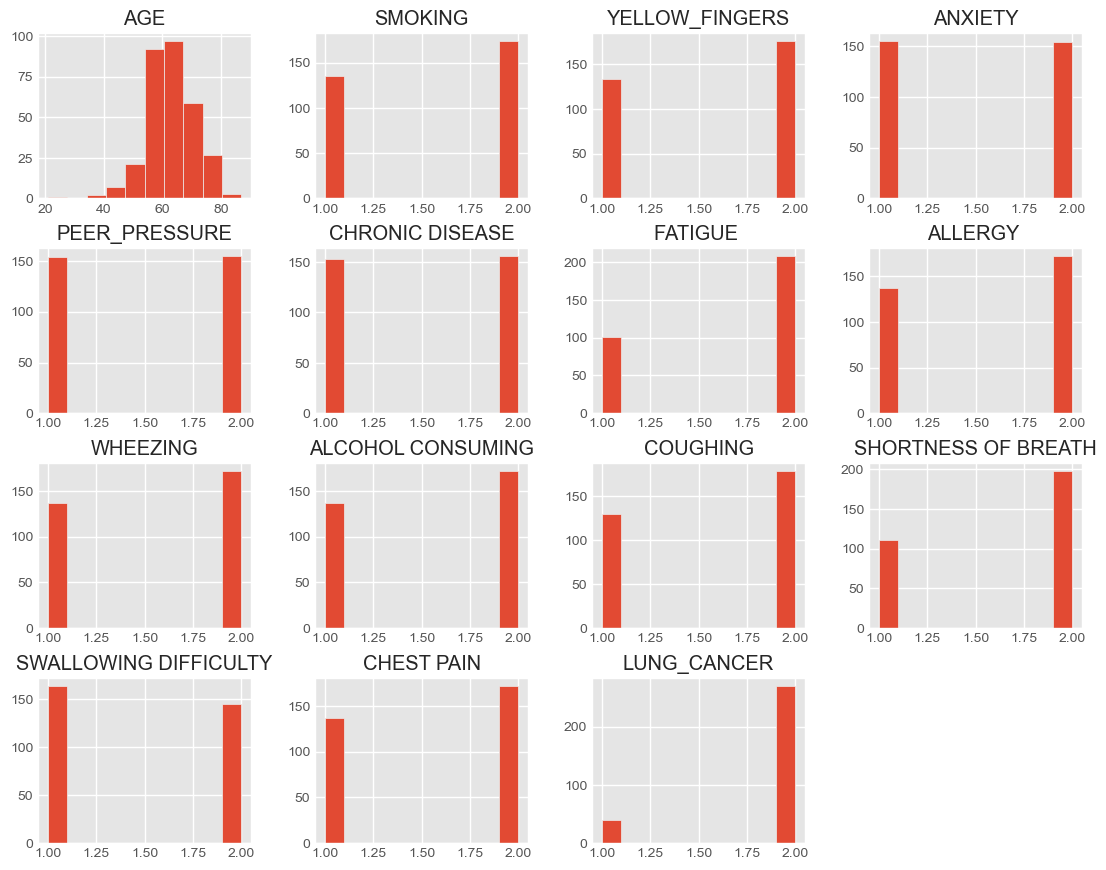

In [9]:
#  Display some histograms to get a quick visualization of the data

df.hist(figsize=(12,10))
plt.show()

In [26]:
# Group by age

# Group by 20-35
# # these are the 'unique' years in 
# the data
np.array(sorted(df.AGE.unique()))

array([21, 38, 39, 44, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 81, 87])

In [27]:
# right = True, by default
pd.cut(df.AGE, bins=4, right=True).head()

GENDER
M    (54.0, 70.5]
M    (70.5, 87.0]
F    (54.0, 70.5]
M    (54.0, 70.5]
F    (54.0, 70.5]
Name: AGE, dtype: category
Categories (4, interval[float64, right]): [(20.934, 37.5] < (37.5, 54.0] < (54.0, 70.5] < (70.5, 87.0]]

In [11]:
# Look at symptoms (coughing, shortness of breath) by alcohol and smoking - Vice Penalty

grouped = df.groupby(['LUNG_CANCER'])
grouped_smoking = grouped['SMOKING'].agg('sum')/2
grouped_smoking

LUNG_CANCER
1     29.0
2    212.5
Name: SMOKING, dtype: float64

In [12]:
grouped2 = df.groupby(['LUNG_CANCER'])
grouped_alcohol = grouped2['ALCOHOL CONSUMING'].agg('sum')/2
grouped_alcohol

LUNG_CANCER
1     23.0
2    217.5
Name: ALCOHOL CONSUMING, dtype: float64

In [13]:
grouped3 = df.groupby(['LUNG_CANCER'])
grouped_alcohol = grouped3['CHRONIC DISEASE'].agg('sum')/2
grouped_alcohol

LUNG_CANCER
1     26.5
2    206.0
Name: CHRONIC DISEASE, dtype: float64

In [14]:
# Perform single linear regression for three selected variables, alcohol, smoking, and chronic disease

# keep features only for X
X = df.drop('LUNG_CANCER', axis = 1)

# keep target variable only for y
Y = df['LUNG_CANCER'] 

# split the train test, here we are doing 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [15]:
sc = StandardScaler()
# fit the data i.e calculate the mean and sd of each column
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [16]:
lr = LinearRegression()

predictors = X_train_sc.columns

r_squared_values = []
coefficients = []

for predictor in predictors:
    X_train_predictor = X_train_sc[[predictor]]
    X_test_predictor = X_test_sc[[predictor]]
    
    lr.fit(X_train_predictor, Y_train)
    
    predictions = lr.predict(X_test_predictor)
    
    # Calculate and print the R-squared score
    r_squared = lr.score(X_test_predictor, Y_test)
    r_squared_values.append(r_squared)
    coefficients.append(lr.coef_)
    
for i in range(len(r_squared_values)):
    print(f"R-squared score for {predictors[i]}: {r_squared_values[i]}")
    print(f"Coefficient for {predictors[i]}: {coefficients[i]}")

R-squared score for AGE: -0.4065837273623609
Coefficient for AGE: [0.0302019]
R-squared score for SMOKING: -0.46352531338327974
Coefficient for SMOKING: [0.02427969]
R-squared score for YELLOW_FINGERS: -0.39199007900221083
Coefficient for YELLOW_FINGERS: [0.06560495]
R-squared score for ANXIETY: -0.43606787604303876
Coefficient for ANXIETY: [0.05411128]
R-squared score for PEER_PRESSURE: -0.40054827297321527
Coefficient for PEER_PRESSURE: [0.06701145]
R-squared score for CHRONIC DISEASE: -0.40894158674499237
Coefficient for CHRONIC DISEASE: [0.03910217]
R-squared score for FATIGUE : -0.8781440374359617
Coefficient for FATIGUE : [0.07318125]
R-squared score for ALLERGY : -0.36802435710718884
Coefficient for ALLERGY : [0.11990603]
R-squared score for WHEEZING: -0.37114931364058124
Coefficient for WHEEZING: [0.08998472]
R-squared score for ALCOHOL CONSUMING: -0.6761756514910153
Coefficient for ALCOHOL CONSUMING: [0.11436449]
R-squared score for COUGHING: -0.5373708164184876
Coefficient fo

In [19]:
# Create the regression model
model = LinearRegression()

# Define the predictor variables (X) and target variable (y)
X = df[['SMOKING']]
y = df['LUNG_CANCER']

# Fit the model
model.fit(X, y)

# Get the coefficients (slope) and intercept
coef = model.coef_
intercept = model.intercept_

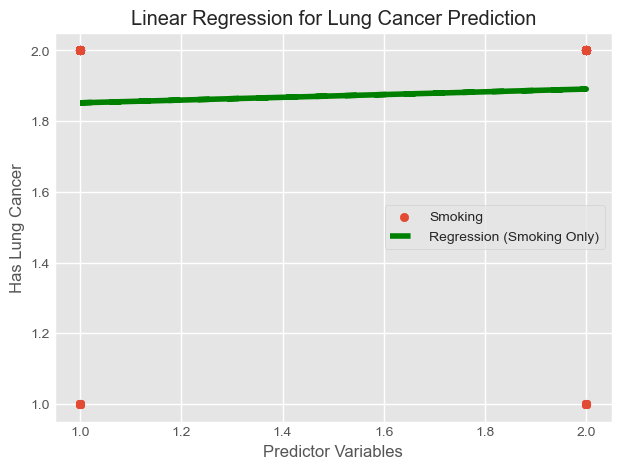

In [20]:
# Create a scatter plot of the data points
plt.scatter(df['SMOKING'], y, label='Smoking')


# Plot the regression lines

plt.plot(df['SMOKING'], coef[0] * df['SMOKING'] + intercept, label='Regression (Smoking Only)', linestyle='--', color='green')

# Customize the plot
plt.xlabel('Predictor Variables')
plt.ylabel('Has Lung Cancer')
plt.legend()
plt.title('Linear Regression for Lung Cancer Prediction')
plt.grid(True)

# Show the plot
plt.show()

In [22]:
X = df[['SMOKING', 'ALCOHOL CONSUMING', 'CHRONIC DISEASE']]  # Binary predictor variables
y = df['LUNG_CANCER']  # Binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62

Confusion Matrix:
 [[ 0  2]
 [ 0 60]]
Accuracy Score: 0.967741935483871


/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif